In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [68]:
election=pd.read_csv("Election.csv")
election.head()

,Unnamed: 0,Age,Gender,Average_Donation_1000,Household_members,Political_Party_Member,Region,Donation_Made
0,0,19,female,27.900,0,yes,South,16884.92400
1,1,18,male,33.770,1,no,South,1725.55230
2,2,28,male,33.000,3,no,South,4449.46200
3,3,33,male,22.705,0,no,North,21984.47061
4,4,32,male,28.880,0,no,North,3866.85520


In [69]:
election.drop("Unnamed: 0",axis=1,inplace=True)

In [70]:
election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     1338 non-null   int64  
 1   Gender                  1338 non-null   object 
 2   Average_Donation_1000   1338 non-null   float64
 3   Household_members       1338 non-null   int64  
 4   Political_Party_Member  1338 non-null   object 
 5   Region                  1338 non-null   object 
 6   Donation_Made           1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [20]:
election.describe()

,Age,Average_Donation_1000,Household_members,Donation_Made
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [22]:
dups = election.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
election[dups]

Number of duplicate rows = 1


,Age,Gender,Average_Donation_1000,Household_members,Political_Party_Member,Region,Donation_Made
581,19,male,30.59,0,no,North,1639.5631


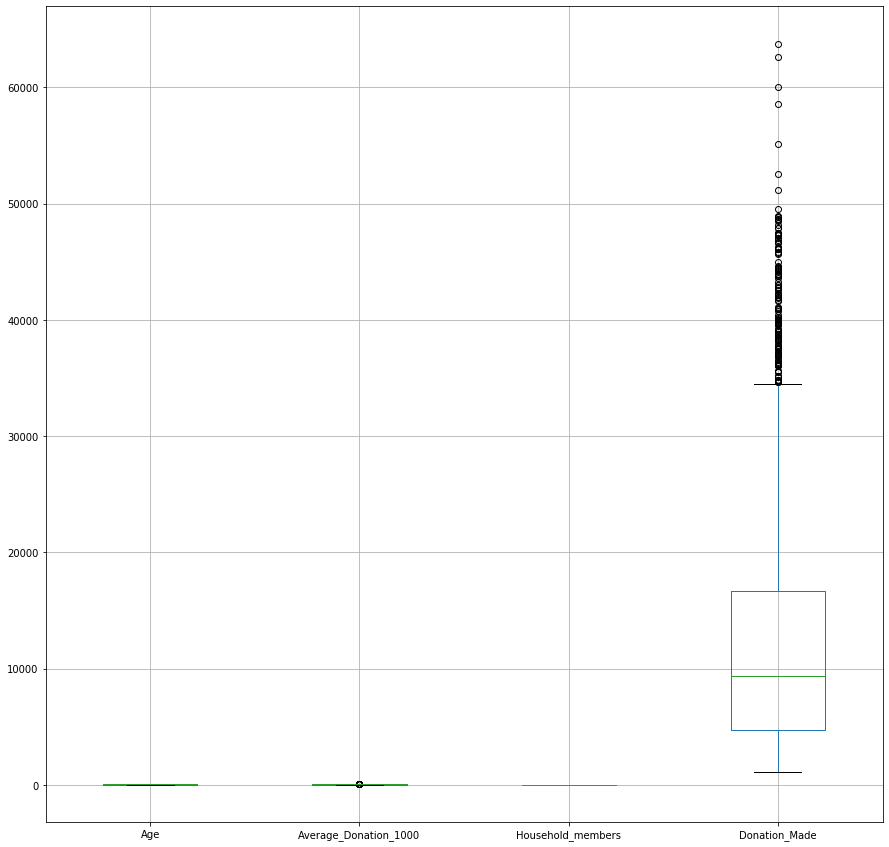

In [25]:
plt.figure(figsize=(15,15))
election.boxplot()

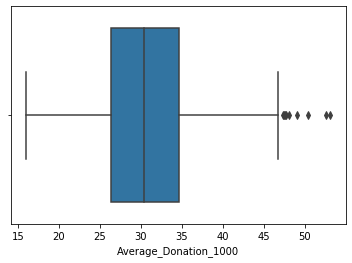

In [26]:
sns.boxplot(election['Average_Donation_1000'])

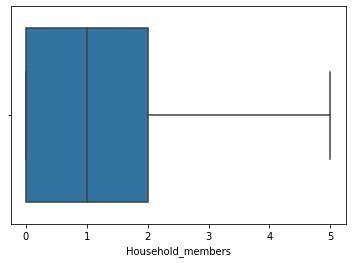

In [57]:
sns.boxplot(election['Household_members'])

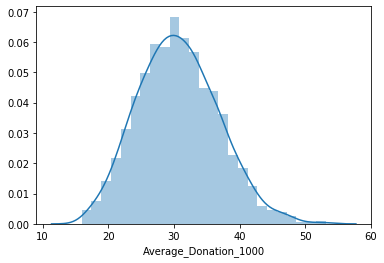

In [27]:
sns.distplot(election['Average_Donation_1000'])

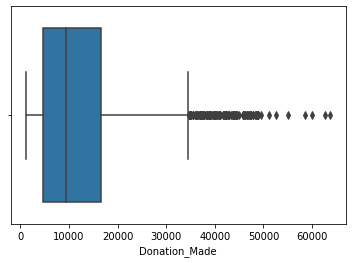

In [28]:
sns.boxplot(election['Donation_Made'])

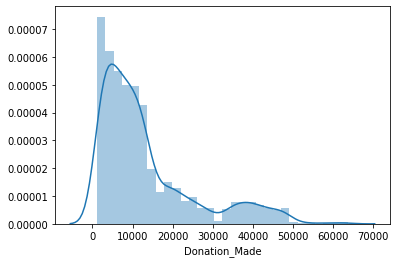

In [30]:
sns.distplot(election['Donation_Made'])

In [34]:
def univariateAnalysis_category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(election[cat_column].value_counts())
    sns.countplot(x=cat_column, data=election, palette='pastel')
    plt.show()
    print("       ")

In [35]:
election_object = election.select_dtypes(include = ['object']) 
lstcatcolumns = list(election_object.columns.values)
lstcatcolumns

['Gender', 'Political_Party_Member', 'Region']

Details of Gender
----------------------------------------------------------------
male      676
female    662
Name: Gender, dtype: int64


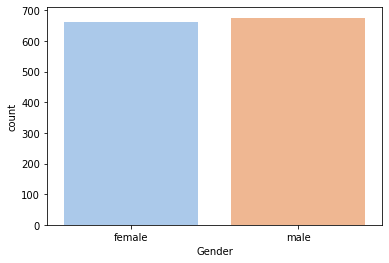

       
Details of Political_Party_Member
----------------------------------------------------------------
no     1064
yes     274
Name: Political_Party_Member, dtype: int64


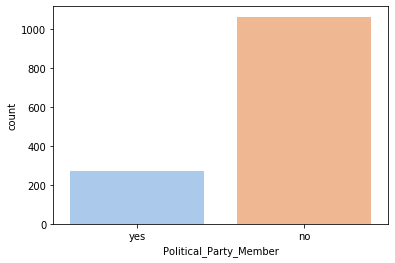

       
Details of Region
----------------------------------------------------------------
South    689
North    649
Name: Region, dtype: int64


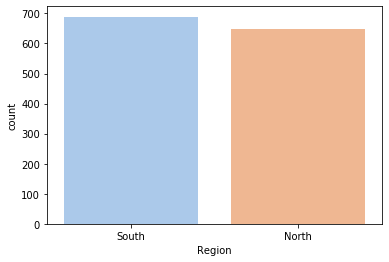

In [36]:
for x in lstcatcolumns:
    univariateAnalysis_category(x)

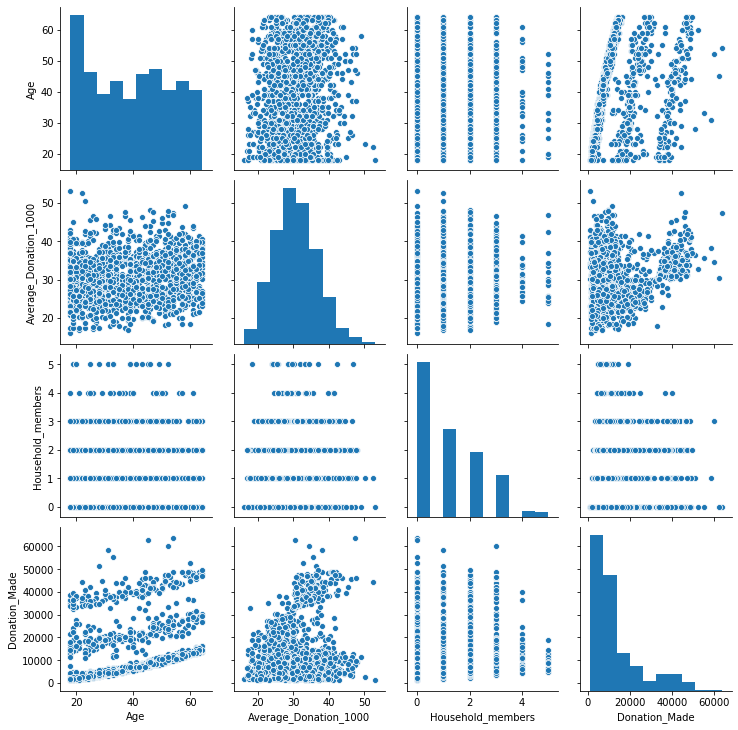

In [37]:
sns.pairplot(election)

In [38]:
election.corr()

,Age,Average_Donation_1000,Household_members,Donation_Made
Age,1.000000,0.109272,0.042469,0.299008
Average_Donation_1000,0.109272,1.000000,0.012759,0.198341
Household_members,0.042469,0.012759,1.000000,0.067998
Donation_Made,0.299008,0.198341,0.067998,1.000000


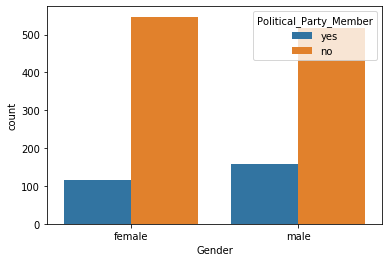

In [39]:
sns.countplot(x='Gender',hue='Political_Party_Member',data=election)

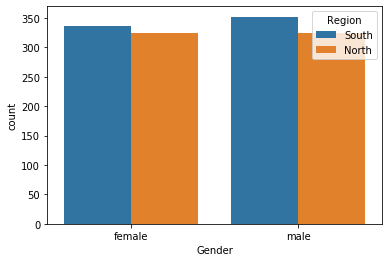

In [40]:
sns.countplot(x='Gender',hue='Region',data=election)

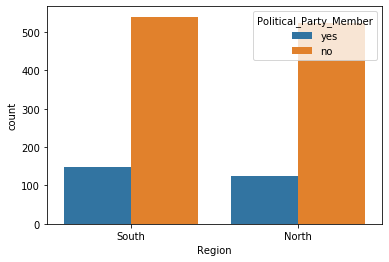

In [41]:
sns.countplot(x='Region',hue='Political_Party_Member',data=election)

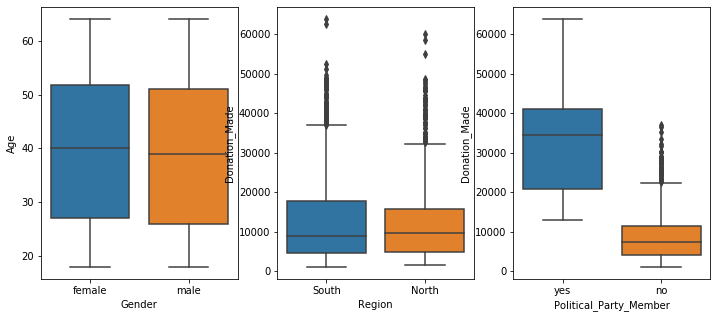

In [43]:
fig_dims = (12, 5)
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=fig_dims)
sns.boxplot(x='Gender', y='Age', data=election, ax=axs[0])
sns.boxplot(x='Region', y='Donation_Made', data=election, ax=axs[1])
sns.boxplot(x='Political_Party_Member', y='Donation_Made', data=election, ax=axs[2])

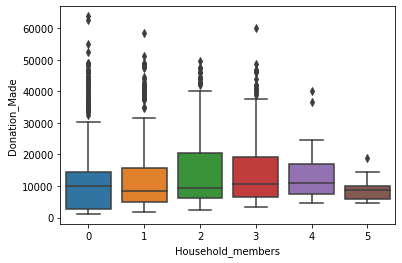

In [45]:
sns.boxplot(x='Household_members', y='Donation_Made', data=election)

In [50]:
from sklearn.preprocessing import LabelEncoder

## Defining a Label Encoder object instance
LE = LabelEncoder()
election['Political_Party_Member'] = LE.fit_transform(election['Political_Party_Member'])
election.head()

,Age,Gender,Average_Donation_1000,Household_members,Political_Party_Member,Region,Donation_Made
0,19,female,27.900,0,1,South,16884.92400
1,18,male,33.770,1,0,South,1725.55230
2,28,male,33.000,3,0,South,4449.46200
3,33,male,22.705,0,0,North,21984.47061
4,32,male,28.880,0,0,North,3866.85520


In [51]:
election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     1338 non-null   int64  
 1   Gender                  1338 non-null   object 
 2   Average_Donation_1000   1338 non-null   float64
 3   Household_members       1338 non-null   int64  
 4   Political_Party_Member  1338 non-null   int32  
 5   Region                  1338 non-null   object 
 6   Donation_Made           1338 non-null   float64
dtypes: float64(2), int32(1), int64(2), object(2)
memory usage: 68.1+ KB


In [71]:
election_dummy = pd.get_dummies(election,drop_first=True)
election_dummy.head()

,Age,Average_Donation_1000,Household_members,Donation_Made,Gender_male,Political_Party_Member_yes,Region_South
0,19,27.900,0,16884.92400,0,1,1
1,18,33.770,1,1725.55230,1,0,1
2,28,33.000,3,4449.46200,1,0,1
3,33,22.705,0,21984.47061,1,0,0
4,32,28.880,0,3866.85520,1,0,0


In [75]:
X=election_dummy.drop('Donation_Made',axis=1)
Y=election_dummy['Donation_Made']

In [83]:
import statsmodels.api as sm
X=sm.add_constant(X)

In [84]:
model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Donation_Made   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.4
Date:                Sun, 07 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:39:00   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -1.209e+04    949.712    -12.734      0.000    -1.4e+04   -1.02e+04
Age                          256.9473     11.887     21.616      0.000     233.628     280.267
Average_Donation_1000        338.3843     28.169     12.013      0.000     283.125     393.644
Household_members            473.1152    137.610      3.438      0.001     203.159     743.071
Gender_male                 -130.2911    332.764     -0.392      0.695    -783.091     522.509
Political_Party_Member_yes  2.385e+04    411.954     57.899      0.000     2.3e+04    2.47e+04
Region_South                -820.6776    341.265     -2.405      0.016   -1490.153    -151.202
==============================================================================
Omnibus:                      299.473   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              713.898
Skew:                           1.209   Prob(JB):                    9.53e-156
Kurtosis:                       5.637   Cond. No.                         295.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [76]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

Age ---> 7.556107095444354
Average_Donation_1000 ---> 10.14189206712345
Household_members ---> 1.799773649846707
Gender_male ---> 2.0008363943491405
Political_Party_Member_yes ---> 1.2577246882676285
Region_South ---> 2.1851363053057367


In [80]:
import statsmodels.formula.api as sm

In [81]:
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [82]:
vif_cal(input_data=election_dummy.drop('Donation_Made',axis=1))

Age  VIF =  1.02
Average_Donation_1000  VIF =  1.07
Household_members  VIF =  1.0
Gender_male  VIF =  1.01
Political_Party_Member_yes  VIF =  1.01
Region_South  VIF =  1.06


In [85]:
y_pred = model.predict(X)
print(y_pred)

0       25260.240176
1        3480.676488
2        6735.824365
3        3938.226667
4        5770.802293
            ...     
1333    12522.423104
1334     3332.519007
1335     4180.075973
1336     1211.771621
1337    37268.615245
Length: 1338, dtype: float64


In [88]:
mse = (np.sum(np.square(Y - y_pred)))/election_dummy.shape[0]
mse

36517688.407862075

In [89]:
Lr_1 = np.sqrt(mse)

print("The Root Mean Square Error (RMSE) of the model is",Lr_1)

The Root Mean Square Error (RMSE) of the model is 6042.986712533966
